In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.preprocessing import scale

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
#Lets read the dataset

housing = pd.read_csv('train.csv', encoding = 'latin')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print("Shape {}".format(housing.shape))

Shape (1460, 81)


In [4]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
#Lets check the percentage of null values in the columns

round(housing.isnull().sum()/len(housing.index)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [7]:
# lets check for null values in the categorical columns

housing.select_dtypes(include='object').isnull().sum()[housing.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
# Lets replace NA with None in the following columns below : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    housing[col]=housing[col].fillna('None')

In [9]:
# Lets drop columns with missing values greater than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = housing.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(housing[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# Remove the columns with skewed data

housing.drop(columnsToBeRemoved, axis = 1, inplace = True)

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [10]:
# We see that there are no null values in categorical columns

housing.select_dtypes(include='object').isnull().sum()[housing.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

In [11]:
# Lets check the null values in the numerical data

housing.select_dtypes(include=['int64','float']).isnull().sum()[housing.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [12]:
# Lets impute the null values with median values for LotFrontage and MasVnrArea columns

housing['LotFrontage'] = housing['LotFrontage'].replace(np.nan, housing['LotFrontage'].median())
housing['MasVnrArea'] = housing['MasVnrArea'].replace(np.nan, housing['MasVnrArea'].median())

In [13]:
# Lets set the null values with 0 for GarageYrBlt for now as we would be handling this column further below

housing['GarageYrBlt']=housing['GarageYrBlt'].fillna(0)
housing['GarageYrBlt'] = housing['GarageYrBlt'].astype(int)

In [14]:
# Lets create a new column named IsRemodelled which indicates if the house was remodelled

def isRemodelled(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
housing['IsRemodelled'] = housing.apply(isRemodelled, axis=1)
housing.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [15]:
# Lets create a new column BuiltOrRemodelledAge which indicates the age of the building

def getAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
housing['BuiltOrRemodelAge'] = housing.apply(getAge, axis=1)
housing.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [16]:
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 

def getGarageOldOrNew(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
housing['OldOrNewGarage'] = housing['GarageYrBlt'].apply(getGarageOldOrNew)
housing.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


In [17]:
#Now lets drop the below columns 

housing.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [18]:
# Lets drop the columns that have more than 85% values associated to a specific value

def getHighNumericalValueCounts():
    column = []
    numerical_columns = housing.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(housing[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
housing.drop(columnsToBeRemoved, axis = 1, inplace = True)

housing.drop(['MoSold'], axis = 1, inplace = True)

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1


In [19]:
# Lets check for percentage of null values in each column

percent_missing = round(100*(housing.isnull().sum()/len(housing.index)), 2)
print(percent_missing)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0


In [20]:
# Lets check if there are any duplicate values in the dataset

housing[housing.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage


### Handling Outliers

In [21]:
# Checking outliers at 25%,50%,75%,90%,95% and above

housing.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


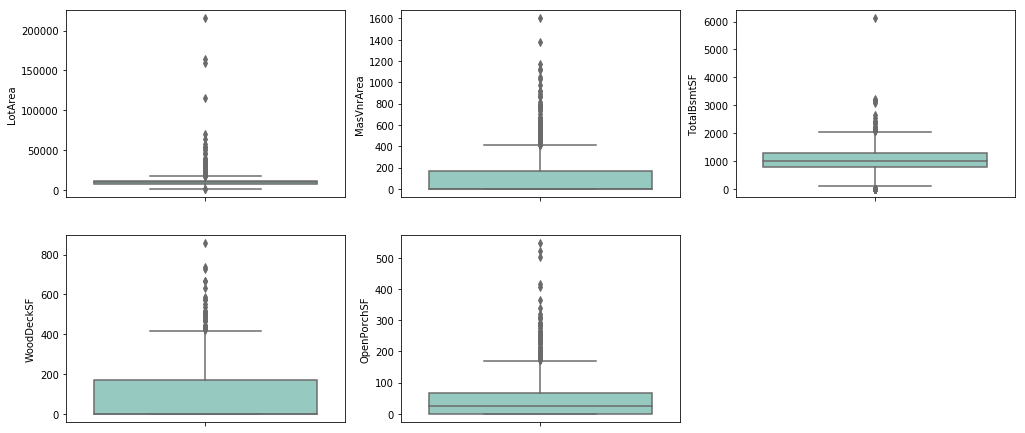

In [22]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = housing)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = housing)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = housing)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = housing)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = housing)
plt.show()

In [23]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = housing['LotArea'].quantile(0.98)
housing = housing[housing["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = housing['MasVnrArea'].quantile(0.98)
housing = housing[housing["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = housing['TotalBsmtSF'].quantile(0.99)
housing = housing[housing["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = housing['WoodDeckSF'].quantile(0.99)
housing = housing[housing["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = housing['OpenPorchSF'].quantile(0.99)
housing = housing[housing["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [24]:
# Lets check the percentage of data retained

num_data = round(100*(len(housing)/1460),2)
print(num_data)

93.01


### Data Visualisation

<Figure size 1800x1080 with 0 Axes>

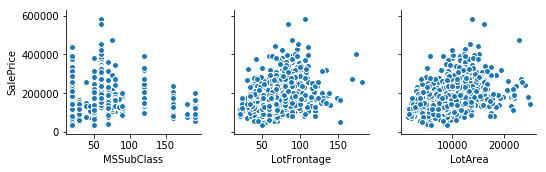

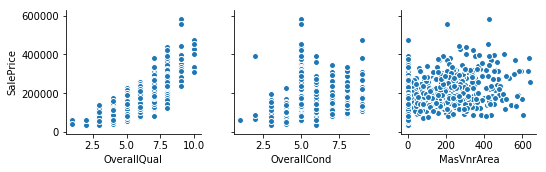

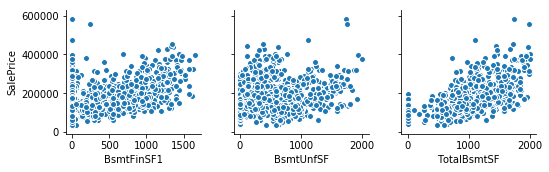

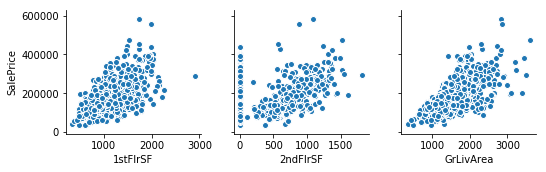

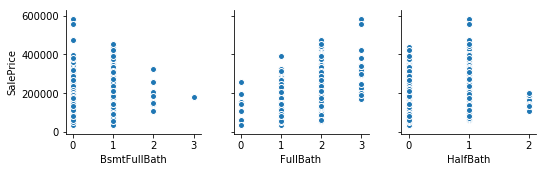

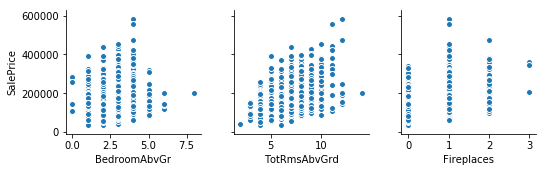

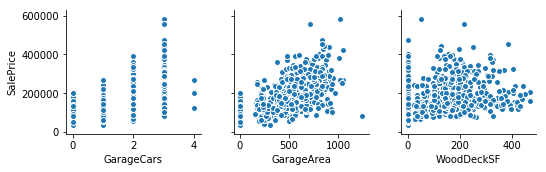

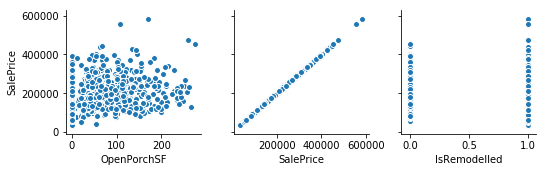

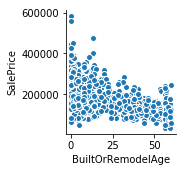

In [25]:
# Check the numerical values using pairplots

plt.figure(figsize=(25,15))
sns.pairplot(housing, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice', aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice', aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice', aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice', aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice', aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice', aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice', aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice', aspect=1,kind='scatter')
plt.show()

#### Observations :  1stFlrSF, GrLivArea, LotArea seems to be showing correlation towards right 

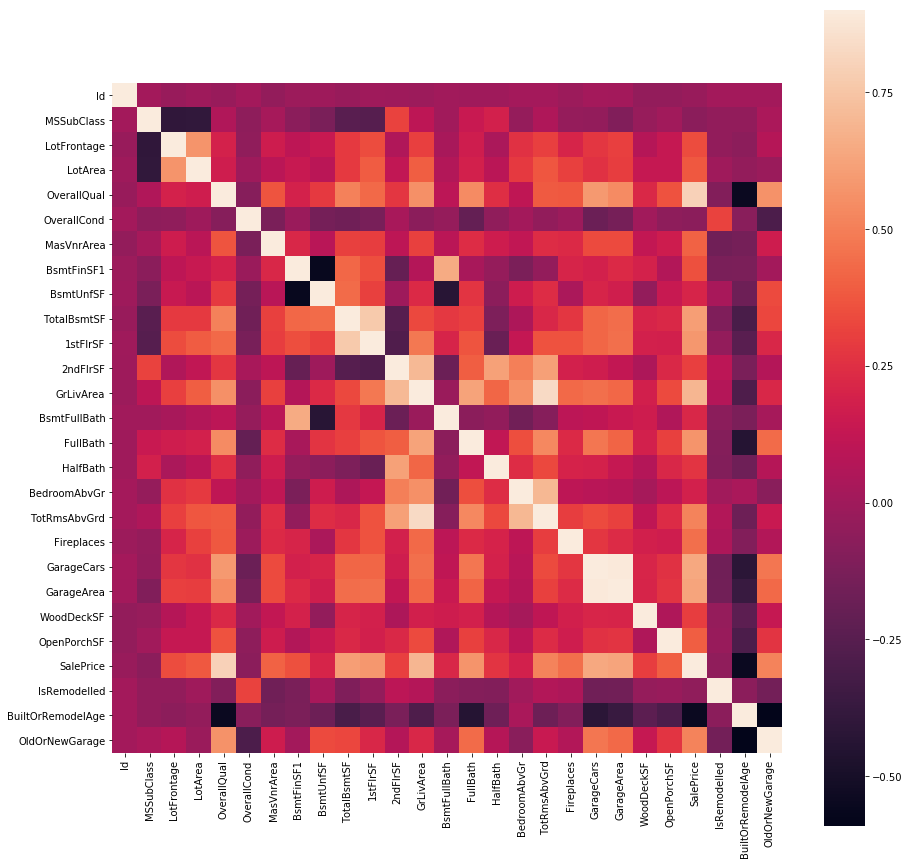

In [26]:
#Lets plot a correlation map to see how features are correlated with SalePrice
corrmat = housing.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corrmat, vmax=0.9, square=True)

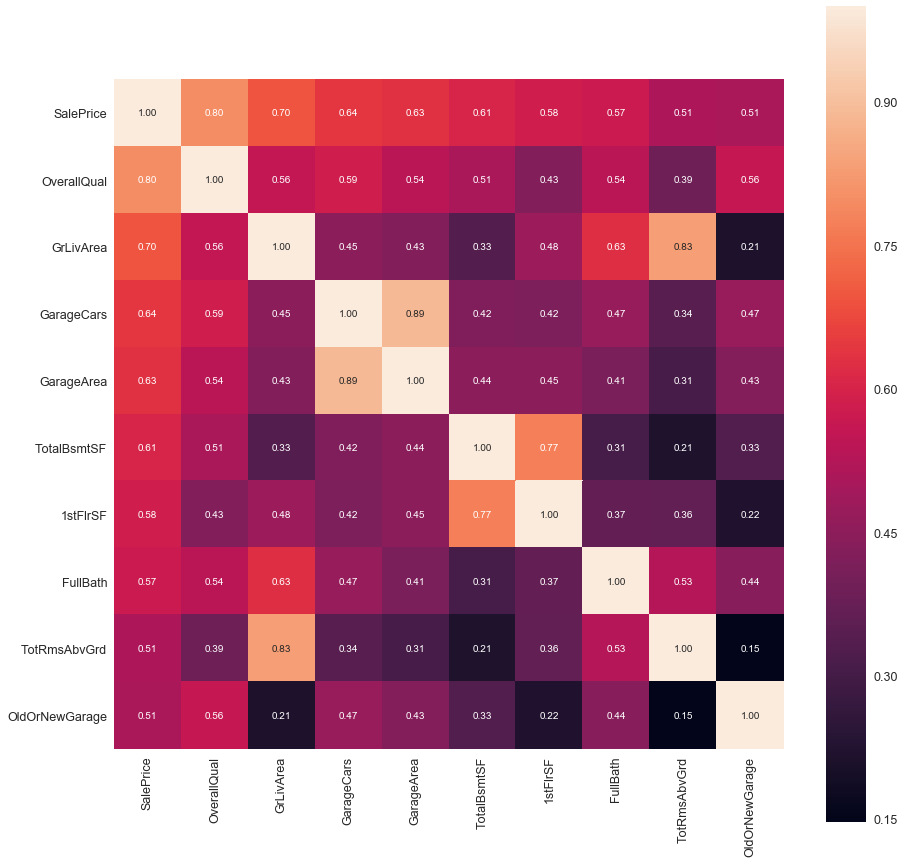

In [27]:

cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(15,15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

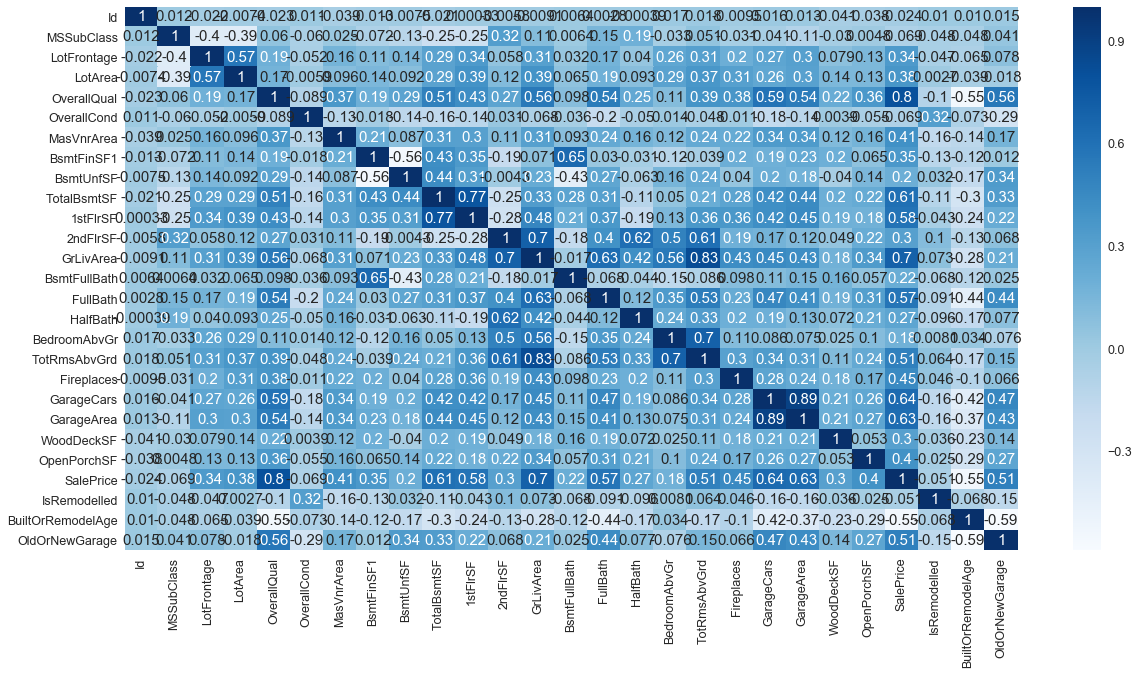

In [28]:
plt.figure(figsize = (20, 10))
sns.heatmap(housing.corr(), annot = True, cmap="Blues")
plt.show()

#### Observation: Some of the variable have high correlation with SalePrice --> TotRmsAbvGrd, GrLivArea, Garage Area, Garage Cars

In [29]:
# Removing the highly correlated variables

housing.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

D:\Deepika\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


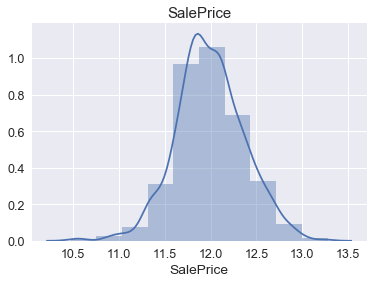

In [30]:
# Lets visualise the target variable

housing['SalePrice'] = np.log1p(housing['SalePrice'])

plt.title('SalePrice')
sns.distplot(housing['SalePrice'], bins=10)
plt.show()

#The target variable looks to be normally distributed

In [31]:
housing.shape

(1358, 47)

### Data Preparation

In [32]:
#Lets convert categorical data to numeric data

housing['d_LotShape'] = housing['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housing['d_ExterQual'] = housing['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housing['d_BsmtQual'] = housing['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing['d_BsmtExposure'] = housing['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housing['d_BsmtFinType1'] = housing['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
housing['d_HeatingQC'] = housing['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing['d_KitchenQual'] = housing['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing['d_FireplaceQu'] = housing['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing['d_GarageFinish'] = housing['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housing['d_BldgType'] = housing['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
housing['d_HouseStyle'] = housing['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
housing['d_Fence'] = housing['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
housing['d_LotConfig'] = housing['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
housing['d_MasVnrType'] = housing['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
housing['d_SaleCondition'] = housing['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [33]:
#Lets drop the below columns

housing = housing.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [34]:
# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(housing['MSZoning'], prefix='MSZoning', drop_first = True)
housing = pd.concat([housing, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(housing['Neighborhood'], prefix='Neighborhood', drop_first = True)
housing = pd.concat([housing, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(housing['RoofStyle'], prefix='RoofStyle', drop_first = True)
housing = pd.concat([housing, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(housing['Exterior1st'], prefix='Exterior1st', drop_first = True)
housing = pd.concat([housing, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(housing['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housing = pd.concat([housing, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(housing['Foundation'], prefix='Foundation', drop_first = True)
housing = pd.concat([housing, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(housing['GarageType'], prefix='GarageType', drop_first = True)
housing = pd.concat([housing, d_GarageType], axis = 1)

housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [35]:
#Lets drop the below columns
housing = housing.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


### Modelling

In [36]:
X = housing.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [37]:
y = housing['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [38]:
# scaling the features

from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [40]:
# split into train and test

from sklearn.cross_validation import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

D:\Deepika\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Recursive feature elimination

In [41]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [44]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

temp = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp = temp.loc[temp['rfe_support'] == True]
temp.reset_index(drop=True, inplace=True)

temp

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,TotalBsmtSF,True,1
5,1stFlrSF,True,1
6,2ndFlrSF,True,1
7,GrLivArea,True,1
8,BsmtFullBath,True,1
9,FullBath,True,1


### Model building using Ridge Regression Model

In [45]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [46]:
# mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
24,100,-0.077294,-0.087401,1
23,50,-0.076411,-0.087528,2
22,20,-0.075702,-0.087986,3
21,10,-0.075247,-0.088241,4
20,9,-0.075185,-0.088279,5
19,8,-0.075119,-0.088321,6
18,7,-0.075049,-0.088377,7
17,6,-0.074976,-0.088455,8
16,5,-0.074902,-0.088549,9
15,4,-0.074825,-0.088660,10


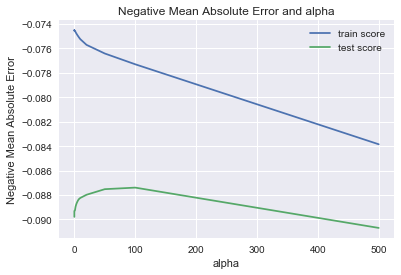

In [47]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [48]:
#best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [49]:
#Lets check the coefficient values with lambda = 10

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-8.94372701e-03, -7.66495759e-04,  2.56275851e-02,  6.21525674e-02,
        4.60114002e-02,  3.00921335e-03,  2.46319347e-02, -2.30662900e-03,
        4.95662360e-02,  2.22561961e-02,  2.13884763e-02,  7.37900259e-02,
        1.19041600e-02,  1.50181019e-02,  2.12634859e-02, -4.59081159e-03,
        1.46933184e-02,  2.94497293e-02,  9.83399472e-03,  6.42691216e-03,
       -1.12819350e-02, -1.90531635e-02,  1.38080506e-02, -1.69156936e-03,
        4.01886964e-03,  9.09964334e-03,  1.36371506e-02,  8.00485156e-03,
        1.67202344e-02,  1.42514041e-02,  6.64979122e-03,  9.34730823e-03,
       -1.54910589e-02,  9.82609289e-03,  8.33443098e-04,  3.59421222e-03,
        1.28129529e-03,  1.33672152e-02,  4.03543008e-02,  1.78702598e-02,
        6.51343200e-02,  4.94562460e-02, -1.40048628e-03, -6.22594515e-03,
       -5.37496191e-03,  1.59503412e-03, -5.57993774e-03,  2.13870267e-02,
       -1.86073783e-02, -8.98261200e-03, -1.44718294e-02, -1.38088469e-02,
       -6.36774695e-03, -

In [50]:
#Lets check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.013633257754889822

In [51]:

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0089
1,LotFrontage,-0.0008
2,LotArea,0.0256
3,OverallQual,0.0622
4,OverallCond,0.0460
5,MasVnrArea,0.0030
6,BsmtFinSF1,0.0246
7,BsmtUnfSF,-0.0023
8,TotalBsmtSF,0.0496
9,1stFlrSF,0.0223


In [52]:
# Lets assign the features and their coefficients to a dictionary

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0089,
 'LotFrontage': -0.0008,
 'LotArea': 0.0256,
 'OverallQual': 0.0622,
 'OverallCond': 0.046,
 'MasVnrArea': 0.003,
 'BsmtFinSF1': 0.0246,
 'BsmtUnfSF': -0.0023,
 'TotalBsmtSF': 0.0496,
 '1stFlrSF': 0.0223,
 '2ndFlrSF': 0.0214,
 'GrLivArea': 0.0738,
 'BsmtFullBath': 0.0119,
 'FullBath': 0.015,
 'HalfBath': 0.0213,
 'BedroomAbvGr': -0.0046,
 'Fireplaces': 0.0147,
 'GarageCars': 0.0294,
 'WoodDeckSF': 0.0098,
 'OpenPorchSF': 0.0064,
 'IsRemodelled': -0.0113,
 'BuiltOrRemodelAge': -0.0191,
 'OldOrNewGarage': 0.0138,
 'd_LotShape': -0.0017,
 'd_ExterQual': 0.004,
 'd_BsmtQual': 0.0091,
 'd_BsmtExposure': 0.0136,
 'd_BsmtFinType1': 0.008,
 'd_HeatingQC': 0.0167,
 'd_KitchenQual': 0.0143,
 'd_FireplaceQu': 0.0066,
 'd_GarageFinish': 0.0093,
 'd_BldgType': -0.0155,
 'd_HouseStyle': 0.0098,
 'd_Fence': 0.0008,
 'd_LotConfig': 0.0036,
 'd_MasVnrType': 0.0013,
 'd_SaleCondition': 0.0134,
 'MSZoning_FV': 0.0404,
 'MSZoning_RH': 0.0179,
 'MSZoning_RL': 0.0651,
 'MSZoning_RM':

In [53]:
#RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [55]:
def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1 = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1 = temp1.loc[temp1['rfe_support'] == True]
temp1.reset_index(drop=True, inplace=True)

temp1['Coefficient'] = temp1['Features'].apply(find)
temp1 = temp1.sort_values(by=['Coefficient'], ascending=False)
temp1 = temp1.head(10)
temp1

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.0738
10,MSZoning_RL,True,1,0.0651
1,OverallQual,True,1,0.0622
4,TotalBsmtSF,True,1,0.0496
11,MSZoning_RM,True,1,0.0495
2,OverallCond,True,1,0.0460
14,Foundation_PConc,True,1,0.0411
9,MSZoning_FV,True,1,0.0404
7,GarageCars,True,1,0.0294
0,LotArea,True,1,0.0256


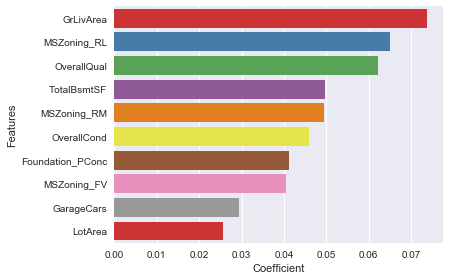

In [56]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1)
plt.show()

#### Observation: This indicates the top 10 variables based on the Ridge Regression model that are significant in predicting the price of a house.

### Model building using Lasso Regression Model

In [57]:
lasso = Lasso()
# list of alphas
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [58]:
#mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
6,0.002,-0.077890,-0.087099,1
7,0.003,-0.078830,-0.087132,2
8,0.004,-0.079695,-0.087364,3
5,0.001,-0.076698,-0.087476,4
9,0.005,-0.080450,-0.087726,5
4,0.0005,-0.075668,-0.087948,6
3,0.0004,-0.075415,-0.088058,7
2,0.0003,-0.075149,-0.088182,8
1,0.0002,-0.074899,-0.088463,9
0,0.0001,-0.074647,-0.088894,10


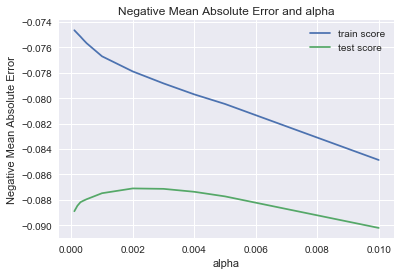

In [59]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [60]:
#best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [61]:
#Lets check the coefficient values with lambda = 0.0004

alpha = 0.0004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-9.33784151e-03, -0.00000000e+00,  2.42479881e-02,  6.54175659e-02,
        4.58976264e-02,  2.25202490e-03,  2.58421444e-02, -1.12082351e-03,
        4.88413189e-02,  3.15321771e-03, -0.00000000e+00,  1.00464634e-01,
        1.10907624e-02,  1.29785511e-02,  1.98171362e-02, -4.61512881e-03,
        1.46206051e-02,  3.09760899e-02,  9.74074914e-03,  5.77116987e-03,
       -1.10764404e-02, -1.94190503e-02,  1.38374241e-02, -1.13115282e-03,
        3.33614828e-03,  8.87563324e-03,  1.48613767e-02,  7.85048785e-03,
        1.61167128e-02,  1.36465706e-02,  6.66620795e-03,  1.00047446e-02,
       -1.38994803e-02,  7.73860651e-03,  0.00000000e+00,  2.61862440e-03,
        1.96084718e-03,  1.33188022e-02,  5.18665411e-02,  2.20520787e-02,
        8.39437264e-02,  6.16252613e-02, -0.00000000e+00, -2.75467474e-03,
       -1.76653927e-05,  3.40093747e-03,  0.00000000e+00,  2.49931580e-02,
       -1.21270985e-02, -4.07685546e-03, -7.95396090e-03, -9.84570591e-03,
       -2.25068348e-03, -

In [62]:
#Lets check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.013221369891546169

In [63]:
#Lets put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0093
1,LotArea,0.0242
2,OverallQual,0.0654
3,OverallCond,0.0459
4,MasVnrArea,0.0023
5,BsmtFinSF1,0.0258
6,BsmtUnfSF,-0.0011
7,TotalBsmtSF,0.0488
8,1stFlrSF,0.0032
9,GrLivArea,0.1005


In [64]:
#Lets put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.009337841513192773,
 'LotFrontage': -0.0,
 'LotArea': 0.024247988104231313,
 'OverallQual': 0.06541756590772187,
 'OverallCond': 0.04589762642819647,
 'MasVnrArea': 0.0022520249023510884,
 'BsmtFinSF1': 0.025842144436474142,
 'BsmtUnfSF': -0.0011208235055596189,
 'TotalBsmtSF': 0.048841318901824485,
 '1stFlrSF': 0.003153217713757119,
 '2ndFlrSF': -0.0,
 'GrLivArea': 0.10046463439499241,
 'BsmtFullBath': 0.011090762403256089,
 'FullBath': 0.01297855110559189,
 'HalfBath': 0.019817136221131584,
 'BedroomAbvGr': -0.004615128805041968,
 'Fireplaces': 0.014620605118004002,
 'GarageCars': 0.030976089924813467,
 'WoodDeckSF': 0.009740749137098994,
 'OpenPorchSF': 0.005771169868968012,
 'IsRemodelled': -0.011076440437490336,
 'BuiltOrRemodelAge': -0.01941905030158837,
 'OldOrNewGarage': 0.013837424143068482,
 'd_LotShape': -0.0011311528220819631,
 'd_ExterQual': 0.0033361482780128655,
 'd_BsmtQual': 0.008875633235329562,
 'd_BsmtExposure': 0.014861376742799233,
 'd_BsmtFinTyp

In [65]:
#RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [66]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2 = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2 = temp2.loc[temp2['rfe_support'] == True]
temp2.reset_index(drop=True, inplace=True)

temp2['Coefficient'] = temp2['Features'].apply(find)
temp2 = temp2.sort_values(by=['Coefficient'], ascending=False)
temp2 = temp2.head(10)
temp2

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.100465
11,MSZoning_RL,True,1,0.083944
1,OverallQual,True,1,0.065418
12,MSZoning_RM,True,1,0.061625
9,MSZoning_FV,True,1,0.051867
4,TotalBsmtSF,True,1,0.048841
2,OverallCond,True,1,0.045898
14,Foundation_PConc,True,1,0.040816
7,GarageCars,True,1,0.030976
3,BsmtFinSF1,True,1,0.025842


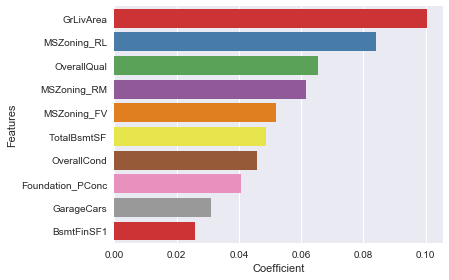

In [68]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2)
plt.show()

#### Observation: This indicates top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.

### Conclusion :

The optimal lambda value in case of Ridge is :10
The optimal lambda value in case of Lasso is :0.0004

The Mean Squared error in case of Ridge - 0.013743
The Mean Squared error in case of Lasso - 0.013556

Since the MSE is lowe in case of Lasso, based on Lasso, the factors that generally affect the price are the Zoning classification, Living area square feet, Overall quality and condition of the house, Foundation type of the house, Number of cars that can be accomodated in the garage, Total basement area in square feet and the Basement finished square feet area

Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.